In [3]:
%load_ext autoreload
%autoreload 2

import plotting_utils
from reports_utils import (
    get_all_results,
    plt_heatmap,
    plot_pulls,
    number_of_pulls,
)

In [16]:
dataset_name = "YaHPOGym_100"
#dataset_name = "TabRepoRaw_30"
#dataset_name = "Complex"

number_of_trails = 32
if dataset_name == "Complex":
    number_of_trails = 12


policy_algorithms = {}

policy_algorithms["PS_PFN_flat_CA_R"] = 1
policy_algorithms["PS_PFN_flat"] = 1
policy_algorithms["PS_PFN_CA_R"] = 1
policy_algorithms["PS_PFN"] = 1
policy_algorithms["PS_PFN_curve_CA_R"] = 1
policy_algorithms["PS_PFN_curve"] = 1

policy_algorithms["PS_Max"] = 1
policy_algorithms["MaxUCB"] = 1
policy_algorithms["TS"] = 1


[3, 6, 11, 12, 14, 15, 16, 18, 22, 23, 24, 28, 29, 31, 32, 37, 38, 42, 44, 46, 50, 54, 60, 151, 181, 182, 188, 300, 307, 312, 334, 375, 377, 458, 469, 470, 1040, 1049, 1050, 1053, 1056, 1063, 1067, 1068, 1111, 1220, 1457, 1461, 1462, 1464, 1468, 1475, 1476, 1478, 1479, 1480, 1485, 1486, 1487, 1489, 1493, 1494, 1497, 1501, 1510, 1515, 1590, 4134, 4154, 4534, 4538, 6332, 23381, 40496, 40498, 40499, 40536, 40668, 40670, 40685, 40701, 40900, 40966, 40975, 40978, 40979, 40981, 40982, 40983, 40984, 40994, 41027, 41138, 41142, 41143, 41146, 41156, 41157, 41162, 41163]


/home/amir/GitHub/CASHPlus/BudgetAwareBandits/plotting_scripts/analysis_utils.py:169: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  mean_res = df.groupby(level=0, axis=1).apply(mean_if_no_nans).fillna(np.inf)
/home/amir/GitHub/CASHPlus/BudgetAwareBandits/plotting_scripts/analysis_utils.py:169: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  mean_res = df.groupby(level=0, axis=1).apply(mean_if_no_nans).fillna(np.inf)
/home/amir/GitHub/CASHPlus/BudgetAwareBandits/plotting_scripts/analysis_utils.py:169: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  mean_res = df.groupby(level=0, axis=1).apply(mean_if_no_nans).fillna(np.inf)
/home/amir/GitHub/CASHPlus/BudgetAwareBandits/plotting_scripts/analysis_utils.py:169: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without a

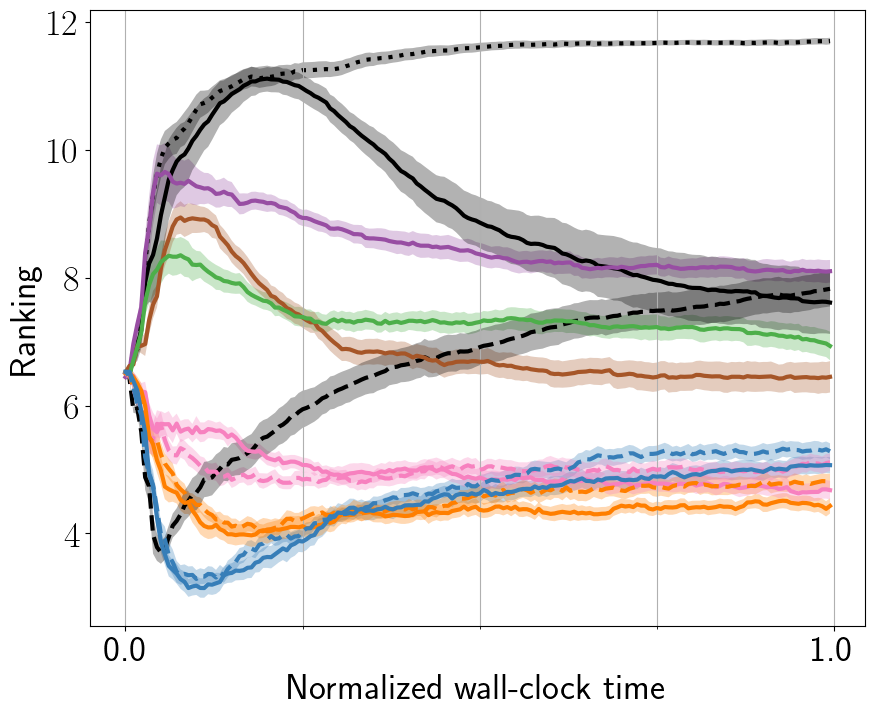

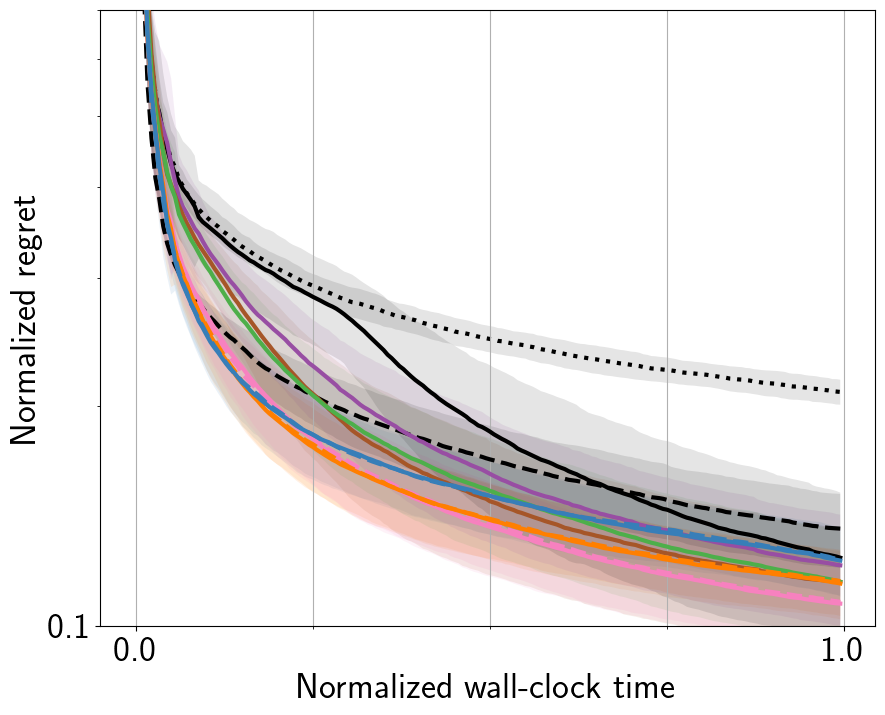

In [17]:

data = get_all_results(
    dataset_name,
    policy_algorithms,
    result_directory="../results_" + str(number_of_trails) + "/",
)


data["legend"] = "seperate"
print(data["instances"])
data["plot_type"] = "Ranking"
data["saving_name"] = "ranking"
data["ylabel"] = "Ranking"
fig1 = plotting_utils.plot_averaged_on_datasets(data)
fig1.savefig(
    f"../results/figures/extras/{dataset_name}_ranking.pdf",
    bbox_inches="tight",
    pad_inches=0.1,
)

data["plot_type"] = "Normalized loss"
data["saving_name"] = "norm_regret"
data["ylabel"] = "Normalized regret"
fig2 = plotting_utils.plot_averaged_on_datasets(data)

fig2.savefig(
    f"../results/figures/extras/{dataset_name}_regret.pdf",
    bbox_inches="tight",
    pad_inches=0.1,
)

/home/amir/GitHub/CASHPlus/BudgetAwareBandits/plotting_scripts/analysis_utils.py:169: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  mean_res = df.groupby(level=0, axis=1).apply(mean_if_no_nans).fillna(np.inf)
/home/amir/GitHub/CASHPlus/BudgetAwareBandits/plotting_scripts/analysis_utils.py:169: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  mean_res = df.groupby(level=0, axis=1).apply(mean_if_no_nans).fillna(np.inf)
/home/amir/GitHub/CASHPlus/BudgetAwareBandits/plotting_scripts/analysis_utils.py:169: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  mean_res = df.groupby(level=0, axis=1).apply(mean_if_no_nans).fillna(np.inf)
/home/amir/GitHub/CASHPlus/BudgetAwareBandits/plotting_scripts/analysis_utils.py:169: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without a

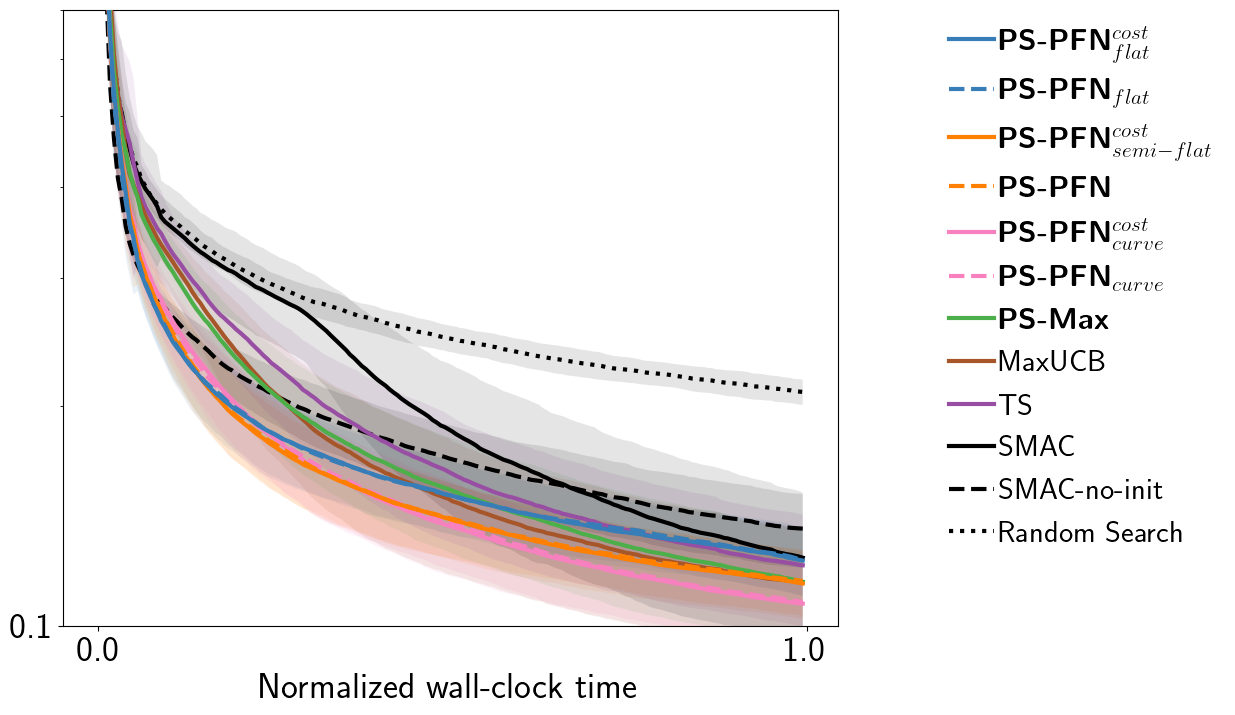

<Figure size 300x800 with 0 Axes>

In [20]:

data = get_all_results(
    dataset_name,
    policy_algorithms,
    result_directory="../results_" + str(number_of_trails) + "/",
)
data["saving_path"] = "legend"
data["plot_type"] = "Normalized loss"
replacement = {"PS_PFN_semi_flat": "PS_PFN", "PS_PFN_CA_R": "PS_PFN_semi_flat_CA_R"}
for k, v in list(data['all_result'].items()):
    data['all_result'][replacement.get(k, k)] = data['all_result'].pop(k)

fig1 = plotting_utils.plot_averaged_on_datasets(data)
fig1.savefig(
    f"../results/figures/extras/{dataset_name}_legend.pdf",
    bbox_inches="tight",
    pad_inches=0.1,
)
data["saving_path"] = None

In [5]:


data = get_all_results(
    dataset_name,
    policy_algorithms,
    result_directory="../results_" + str(number_of_trails) + "/",
)

fig3 = plt_heatmap(data, normalized=True)
fig3.savefig(
    f"../results/figures/{dataset_name}_heatmap.pdf",
    bbox_inches="tight",
    pad_inches=0.1,
)

KeyboardInterrupt: 